In [26]:
import os
import tqdm
import matplotlib.pyplot as plt
from keras import preprocessing, layers, models, optimizers
import numpy as np

In [27]:
path_humans = []
train_path_humans = 'C:/Users/pkpra/OneDrive/Desktop/Vivek/Havells Assignment/Data/Data/human-and-non-human/training_set/training_set/humans'
for path in os.listdir(train_path_humans):
    if '.jpg' in path:
        path_humans.append(os.path.join(train_path_humans, path))
path_nhumans = []
train_path_nhumans = 'C:/Users/pkpra/OneDrive/Desktop/Vivek/Havells Assignment/Data/Data/human-and-non-human/training_set/training_set/non-humans'
for path in os.listdir(train_path_nhumans):
    if '.jpg' in path:
        path_nhumans.append(os.path.join(train_path_nhumans, path))
len(path_nhumans), len(path_humans)

(4006, 4011)

In [ ]:
# load training set
training_set = np.zeros((6000, 150, 150, 3), dtype='float32')
for i in range(6000):
    if i < 3000:
        path = path_nhumans[i]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_humans[i - 3000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)

In [ ]:
training_set.shape

In [17]:
FAST_RUN = False

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
# load validation set
validation_set = np.zeros((2000, 150, 150, 3), dtype='float32')
for i in range(2000):
    if i < 1000:
        path = path_nhumans[i + 3000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_humans[i + 2000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)

In [14]:
validation_set.shape

(2000, 150, 150, 3)

In [15]:
# make target tensor
train_labels = np.zeros((3000,))
train_labels = np.concatenate((train_labels, np.ones((3000,))))
validation_labels = np.zeros((1000,))
validation_labels = np.concatenate((validation_labels, np.ones((1000,))))

In [16]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)
validation_generator = train_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs= 3 if FAST_RUN else 30,
    validation_steps=50,
    validation_data=validation_generator,
)

C:\Users\pkpra\AppData\Local\Temp\ipykernel_3988\1916697595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
50/50 [==============================] - 65s 1s/step - loss: 0.7225 - acc: 0.6600 - val_loss: 0.3090 - val_acc: 0.9506
Epoch 2/30
50/50 [==============================] - 64s 1s/step - loss: 0.3065 - acc: 0.8756 - val_loss: 0.0896 - val_acc: 0.9681
Epoch 3/30
50/50 [==============================] - 67s 1s/step - loss: 0.2429 - acc: 0.9150 - val_loss: 0.0678 - val_acc: 0.9787
Epoch 4/30
50/50 [==============================] - 57s 1s/step - loss: 0.1249 - acc: 0.9506 - val_loss: 0.0423 - val_acc: 0.9869
Epoch 5/30
50/50 [==============================] - 58s 1s/step - loss: 0.1525 - acc: 0.9519 - val_loss: 0.0360 - val_acc: 0.9900
Epoch 6/30
50/50 [==============================] - 58s 1s/step - loss: 0.1695 - acc: 0.9494 - val_loss: 0.0555 - val_acc: 0.9850
Epoch 7/30
50/50 [==============================] - 56s 1s/step - loss: 0.0851 - acc: 0.9729 - val_loss: 0.0651 - val_acc: 0.9769
Epoch 8/30
50/50 [==============================] - 58s 1s/step - loss: 0.0965 - acc: 0.96

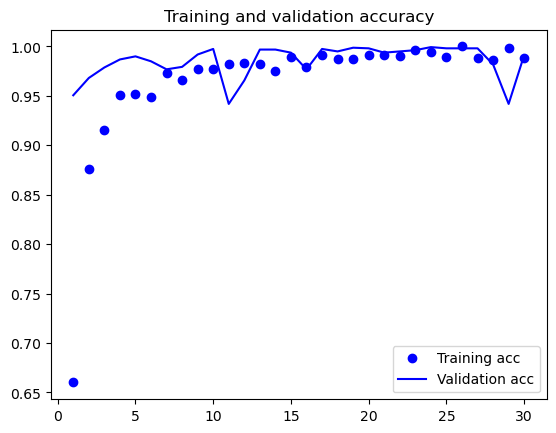

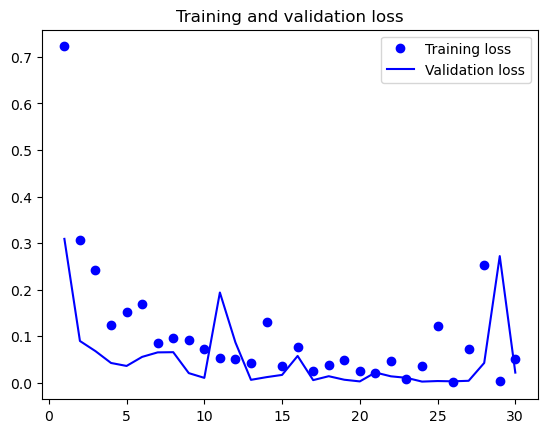

In [19]:
# plot error curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# Demo data augmentation
datagen = preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

<Figure size 640x480 with 0 Axes>

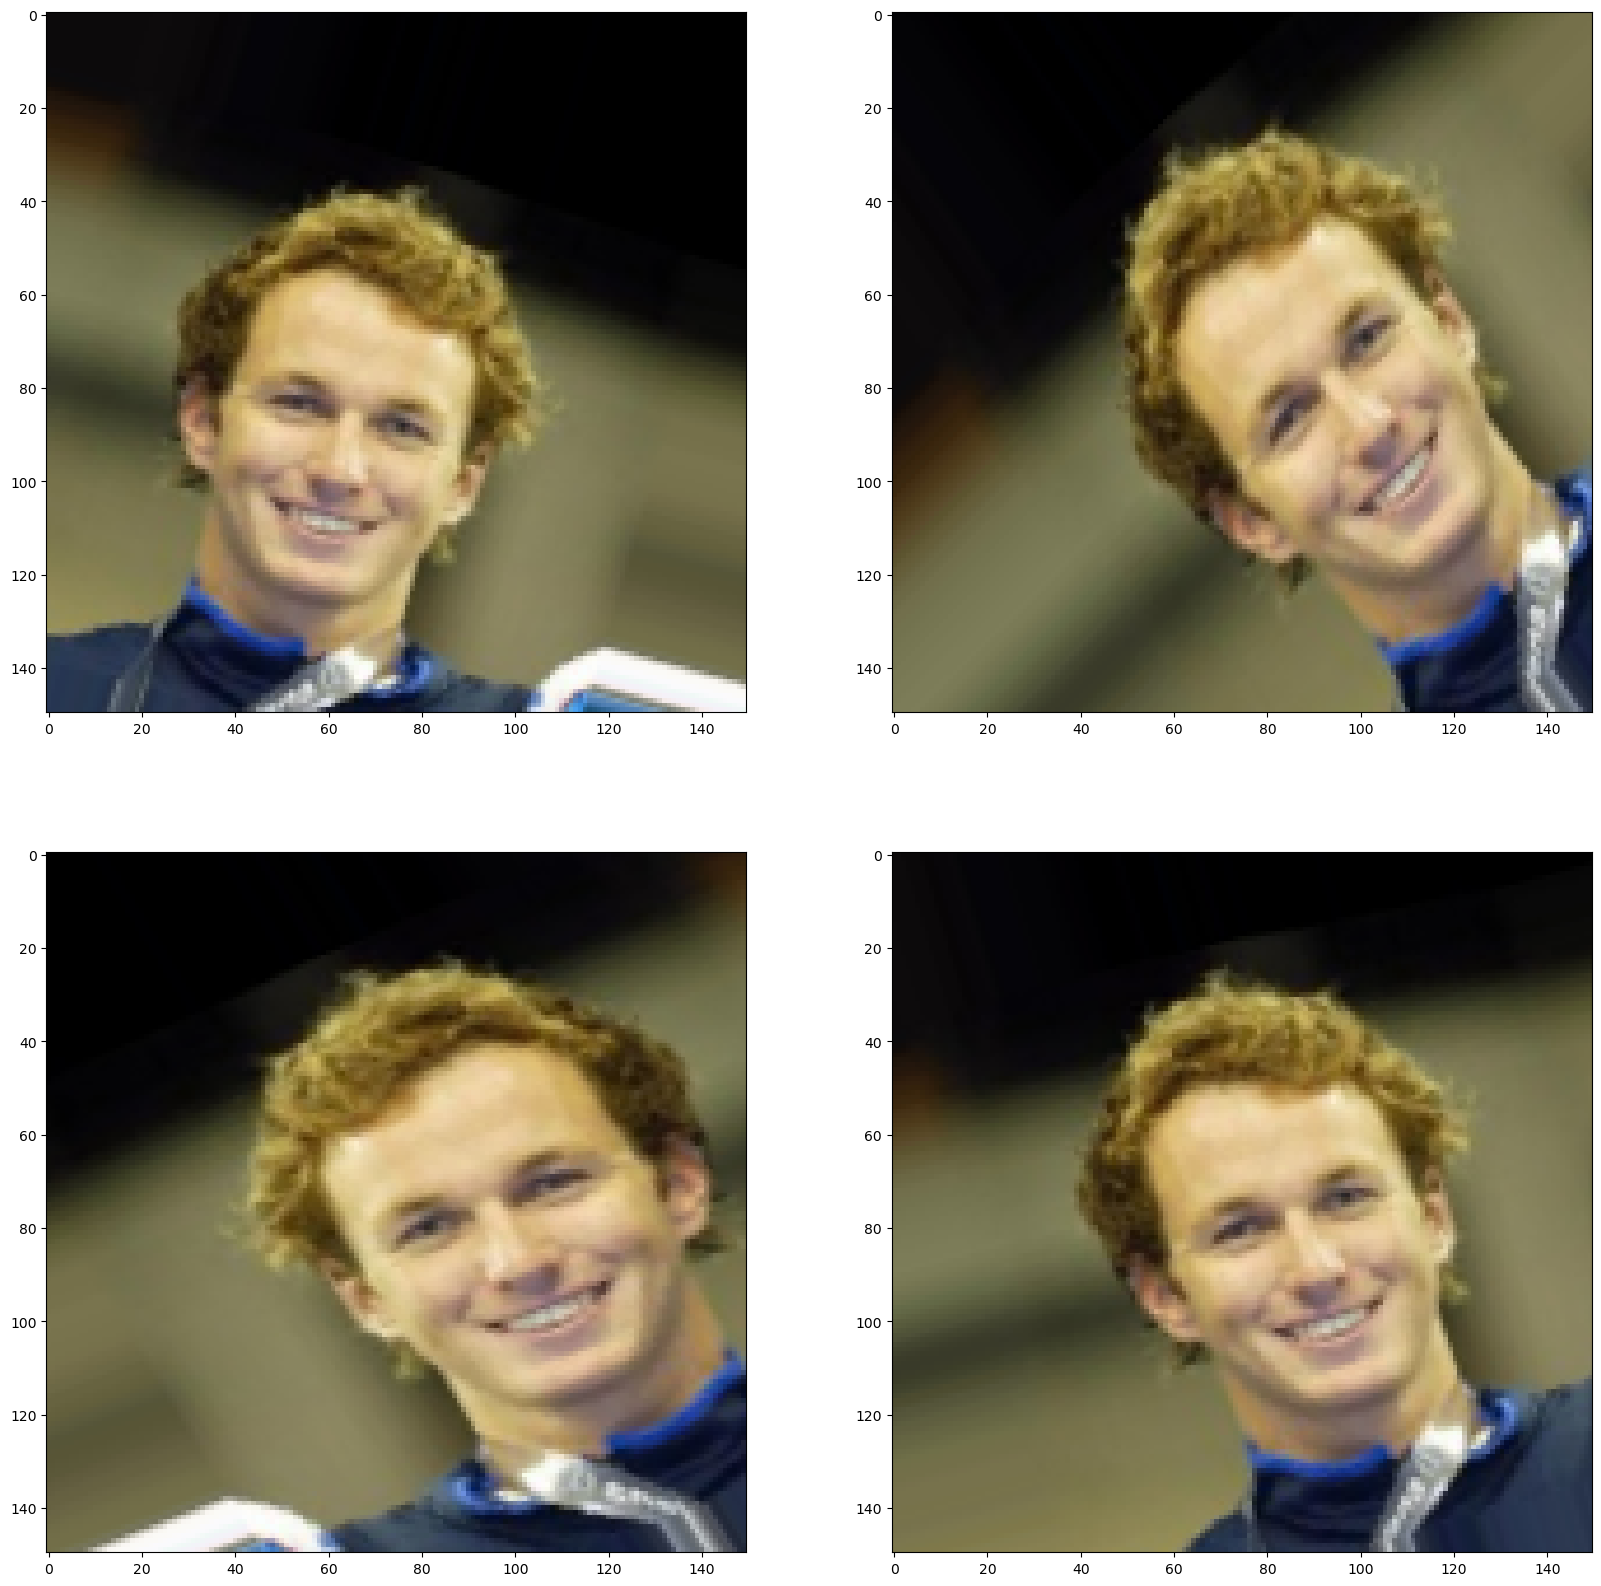

In [21]:
# visualize data augmentations
plt.clf()
fnames = [os.path.join(train_path_humans, fname) for fname in os.listdir(train_path_humans)]
img_path = fnames[3]

img = preprocessing.image.load_img(img_path, target_size=(150, 150))
x = preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(20,20))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [22]:
# Add a dropout layer to fight overfitting as well
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))                       # DROPOUT
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [23]:
# Use data augmentation
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)

# do not augment validation data
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [24]:
# train
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 3 if FAST_RUN else 200, # use more epochs if you are not limited by 1 hour limit
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\pkpra\AppData\Local\Temp\ipykernel_3988\308560858.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
100/100 [==============================] - 103s 1s/step - loss: 0.6173 - acc: 0.6743 - val_loss: 0.2985 - val_acc: 0.8612
Epoch 2/200
100/100 [==============================] - 100s 1000ms/step - loss: 0.3657 - acc: 0.8625 - val_loss: 0.1243 - val_acc: 0.9669
Epoch 3/200
100/100 [==============================] - 103s 1s/step - loss: 0.2584 - acc: 0.9023 - val_loss: 0.0518 - val_acc: 0.9831
Epoch 4/200
100/100 [==============================] - 101s 1s/step - loss: 0.2248 - acc: 0.9109 - val_loss: 0.1925 - val_acc: 0.9181
Epoch 5/200
100/100 [==============================] - 102s 1s/step - loss: 0.1917 - acc: 0.9240 - val_loss: 0.0375 - val_acc: 0.9925
Epoch 6/200
100/100 [==============================] - 104s 1s/step - loss: 0.1804 - acc: 0.9375 - val_loss: 0.0609 - val_acc: 0.9869
Epoch 7/200
100/100 [==============================] - 105s 1s/step - loss: 0.1516 - acc: 0.9441 - val_loss: 0.0398 - val_acc: 0.9856
Epoch 8/200
100/100 [==============================] - 111

Epoch 62/200
100/100 [==============================] - 94s 938ms/step - loss: 0.0344 - acc: 0.9897 - val_loss: 0.0044 - val_acc: 0.9969
Epoch 63/200
100/100 [==============================] - 116s 1s/step - loss: 0.0558 - acc: 0.9884 - val_loss: 0.0298 - val_acc: 0.9944
Epoch 64/200
100/100 [==============================] - 116s 1s/step - loss: 0.0540 - acc: 0.9840 - val_loss: 0.0223 - val_acc: 0.9950
Epoch 65/200
100/100 [==============================] - 105s 1s/step - loss: 0.0448 - acc: 0.9887 - val_loss: 0.0058 - val_acc: 0.9981
Epoch 66/200
100/100 [==============================] - 132s 1s/step - loss: 0.0607 - acc: 0.9844 - val_loss: 0.0080 - val_acc: 0.9981
Epoch 67/200
100/100 [==============================] - 118s 1s/step - loss: 0.0627 - acc: 0.9837 - val_loss: 0.0055 - val_acc: 0.9975
Epoch 68/200
100/100 [==============================] - 128s 1s/step - loss: 0.0612 - acc: 0.9843 - val_loss: 0.0029 - val_acc: 0.9994
Epoch 69/200
100/100 [==============================]

100/100 [==============================] - 102s 1s/step - loss: 0.0511 - acc: 0.9894 - val_loss: 0.0071 - val_acc: 0.9975
Epoch 123/200
100/100 [==============================] - 104s 1s/step - loss: 0.0479 - acc: 0.9899 - val_loss: 0.0046 - val_acc: 0.9987
Epoch 124/200
100/100 [==============================] - 103s 1s/step - loss: 0.0421 - acc: 0.9909 - val_loss: 0.0087 - val_acc: 0.9987
Epoch 125/200
100/100 [==============================] - 106s 1s/step - loss: 0.0613 - acc: 0.9881 - val_loss: 0.0177 - val_acc: 0.9937
Epoch 126/200
100/100 [==============================] - 107s 1s/step - loss: 0.0696 - acc: 0.9887 - val_loss: 0.0073 - val_acc: 0.9981
Epoch 127/200
100/100 [==============================] - 109s 1s/step - loss: 0.0537 - acc: 0.9874 - val_loss: 0.0074 - val_acc: 0.9981
Epoch 128/200
100/100 [==============================] - 104s 1s/step - loss: 0.0407 - acc: 0.9909 - val_loss: 0.0044 - val_acc: 0.9994
Epoch 129/200
100/100 [==============================] - 107s 

100/100 [==============================] - 134s 1s/step - loss: 0.0586 - acc: 0.9909 - val_loss: 0.0294 - val_acc: 0.9969
Epoch 183/200
100/100 [==============================] - 153s 2s/step - loss: 0.0495 - acc: 0.9922 - val_loss: 0.0255 - val_acc: 0.9969
Epoch 184/200
100/100 [==============================] - 115s 1s/step - loss: 0.0439 - acc: 0.9925 - val_loss: 0.0170 - val_acc: 0.9962
Epoch 185/200
100/100 [==============================] - 115s 1s/step - loss: 0.0393 - acc: 0.9925 - val_loss: 0.0177 - val_acc: 0.9969
Epoch 186/200
100/100 [==============================] - 117s 1s/step - loss: 0.0357 - acc: 0.9925 - val_loss: 0.0118 - val_acc: 0.9987
Epoch 187/200
100/100 [==============================] - 109s 1s/step - loss: 0.0752 - acc: 0.9909 - val_loss: 0.0044 - val_acc: 0.9987
Epoch 188/200
100/100 [==============================] - 106s 1s/step - loss: 0.0357 - acc: 0.9915 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 189/200
100/100 [==============================] - 105s 

In [28]:
model.save('human_and_non_human_.h5')

C:\Users\pkpra\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


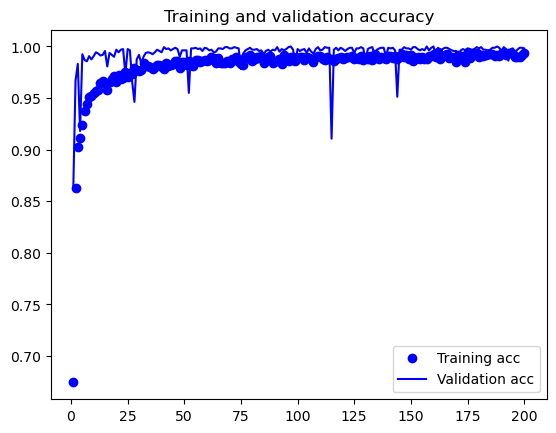

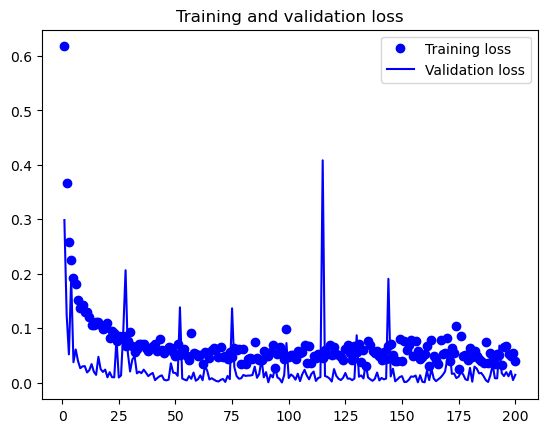

In [25]:
# plot error curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()